In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk import FreqDist
from nltk.corpus import stopwords
import warnings
from scipy.stats import pareto
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

In [ ]:
raw = pd.read_csv('edmunds_forum.csv')
raw['comments'] = raw['comments'].str[1:]
raw.head()

In [ ]:
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

raw['comments'] = raw['comments'].apply(punctuation_extermination)
raw.head()

In [ ]:
corpus = ""
for l in raw['comments']:
    l = str(l).lower()
    corpus += l

corpus[:500]

In [ ]:
corpus = corpus.split()
corpus_without_stop = [word for word in corpus if word not in stopwords.words("english")]
corpus_without_stop[:500]

In [24]:
freq = FreqDist(corpus)
words = [element[0] for element in freq.most_common(100)] # words (x axis)
counts = [element[1] for element in freq.most_common(100)] # freqs (y axis)
l = list(range(1,101))

<Figure size 500x400 with 0 Axes>

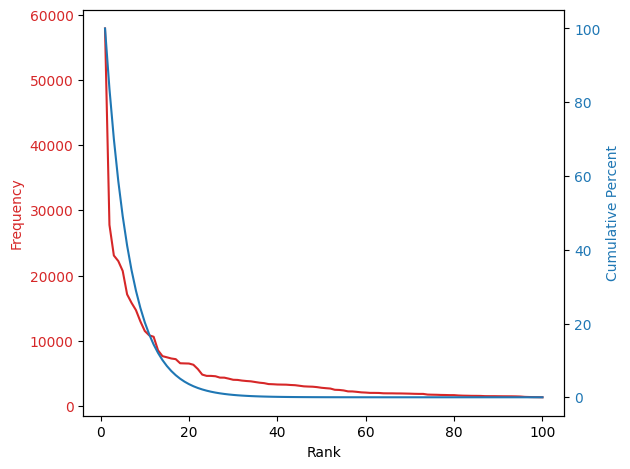

In [76]:
b = 100
p_curve = pareto.rvs(b, size=10000)
x = np.linspace(pareto.ppf(0.00000001, b), pareto.ppf(0.9999999, b), 100)

base = plt.figure(figsize=(5,4))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Rank')
ax1.set_ylabel('Frequency', color=color)
ax1.plot(l, counts, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Cumulative Percent', color=color)
ax2.plot(l, pareto.pdf(x, b))
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


In [ ]:
# Task 2, Find the top 10 brands from frequency counts. You will need to write a script to count the frequencies of words (stopwords should NOT be counted). 
